In [54]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import decomposition, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from Hackaton.python.read_pics import get_pics_from_file


In [55]:
mean_dic = dict()
pics_name = os.listdir('Hackaton/data/')

pics_no_key, info = get_pics_from_file(f'Hackaton/data/pics_NOKEY.bin')
signal_no = np.array(pics_no_key)

mean_dic['pics_NOKEY.bin'] = signal_no.mean(axis=0)


Ouverture du fichier de pics Hackaton/data/pics_NOKEY.bin


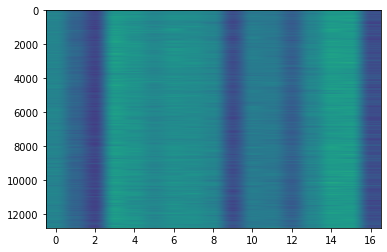

In [56]:
plt.imshow(signal_no, aspect="auto")

In [57]:
noise = mean_dic['pics_NOKEY.bin']
print(noise)
print(noise.max())
print(noise.min())
print(noise.mean())

[0.60882747 0.44143389 0.28319969 0.73451903 0.68999207 0.62673212
 0.66955738 0.6572887  0.61374066 0.32693917 0.56488659 0.5491326
 0.41934943 0.60874417 0.73742308 0.73390148 0.32616818]
0.7374230769172087
0.28319969204066087
0.5642256308621483


In [58]:
pics_dic = {'pics_0.bin': 1, 'pics_1.bin': 2, 'pics_2.bin': 2, 'pics_3.bin': 2,
 'pics_4.bin': 2, 'pics_5.bin': 9, 'pics_6.bin': 9, 'pics_7.bin': 9,
 'pics_8.bin': 9, 'pics_9.bin': 9, 'pics_A.bin': 14, 'pics_B.bin': 10,
 'pics_C.bin': 13, 'pics_CTRL.bin': 4, 'pics_D.bin': 13, 'pics_E.bin': 13,
 'pics_ENTER.bin': 2, 'pics_F.bin': 7, 'pics_G.bin': 8, 'pics_H.bin': 10,
 'pics_I.bin': 11, 'pics_J.bin': 10, 'pics_K.bin': 11, 'pics_L.bin': 12,
'pics_M.bin': 0, 'pics_N.bin': 8,
 'pics_O.bin': 12, 'pics_P.bin': 0, 'pics_Q.bin': 14, 'pics_R.bin': 7, 'pics_S.bin': 6,
 'pics_SHIFT.bin': 5, 'pics_SPACE.bin': 6, 'pics_SUPPR.bin': 1, 'pics_T.bin': 8, 'pics_U.bin': 10,
 'pics_V.bin': 7, 'pics_W.bin': 14, 'pics_X.bin': 6, 'pics_Y.bin': 8, 'pics_Z.bin': 6}


for pic_name in pics_name:
    pics_key, info = get_pics_from_file(f'Hackaton/data/{pic_name}')
    if pic_name != 'pics_NOKEY.bin':
        signal = (np.array(pics_key) - noise).clip(min=0)
        mean_dic[pic_name] = signal.mean(axis=0)





Ouverture du fichier de pics Hackaton/data/pics_0.bin
Ouverture du fichier de pics Hackaton/data/pics_1.bin
Ouverture du fichier de pics Hackaton/data/pics_2.bin
Ouverture du fichier de pics Hackaton/data/pics_3.bin
Ouverture du fichier de pics Hackaton/data/pics_4.bin
Ouverture du fichier de pics Hackaton/data/pics_5.bin
Ouverture du fichier de pics Hackaton/data/pics_6.bin
Ouverture du fichier de pics Hackaton/data/pics_7.bin
Ouverture du fichier de pics Hackaton/data/pics_8.bin
Ouverture du fichier de pics Hackaton/data/pics_9.bin
Ouverture du fichier de pics Hackaton/data/pics_A.bin
Ouverture du fichier de pics Hackaton/data/pics_B.bin
Ouverture du fichier de pics Hackaton/data/pics_C.bin
Ouverture du fichier de pics Hackaton/data/pics_CTRL.bin
Ouverture du fichier de pics Hackaton/data/pics_D.bin
Ouverture du fichier de pics Hackaton/data/pics_E.bin
Ouverture du fichier de pics Hackaton/data/pics_ENTER.bin
Ouverture du fichier de pics Hackaton/data/pics_F.bin
Ouverture du fichier 

Ouverture du fichier de pics Hackaton/data/pics_LOGINMDP.bin
2.5146484375
0.0
0.5992673055452659


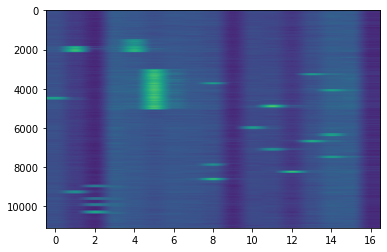

In [59]:
pics_login, info = get_pics_from_file(f'Hackaton/data/pics_LOGINMDP.bin')
array = np.array(pics_login)
plt.imshow(array, aspect="auto")

print(array.max())
print(array.min())
print(array.mean())

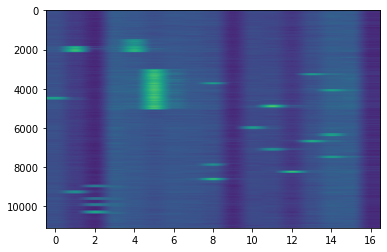

In [60]:
my_copy = np.copy(array)
plt.imshow(my_copy, aspect="auto")


In [61]:
noise.sum()

9.591835724656521

15.2423095703125
1.7236328125
10.18754419426952


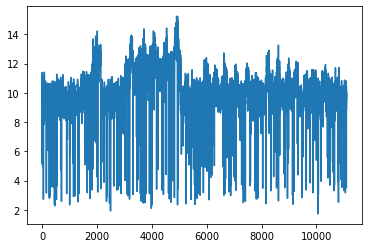

In [62]:
histo = my_copy.sum(axis=1)
print(histo.max())
print(histo.min())
print(histo.mean())


plt.plot(histo)
plt.show()

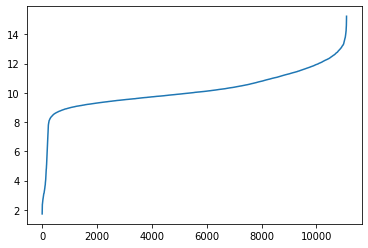

In [63]:
sorted = histo.sort()

plt.plot(histo)
plt.show()

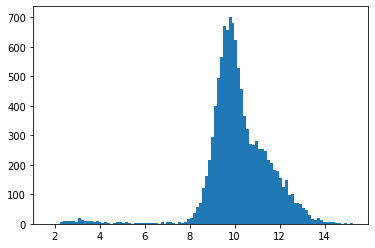

In [64]:
_ = plt.hist(histo, bins='auto')

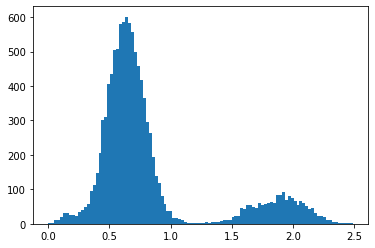

In [65]:
_ = plt.hist(array[:,5], bins='auto')


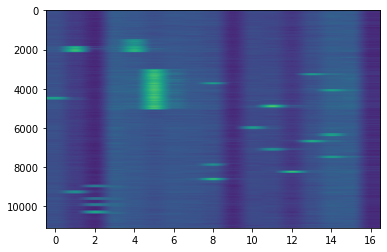

In [66]:
plt.imshow(array, aspect="auto")

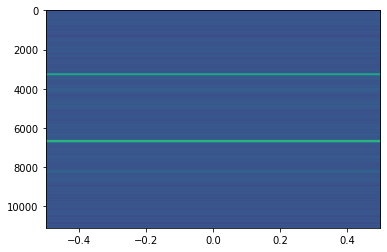

In [85]:
test = array[:,13:14]

plt.imshow(test, aspect="auto")

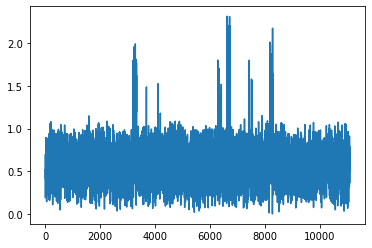

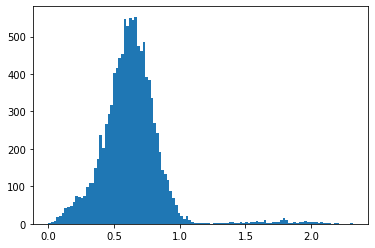

In [86]:

plt.plot(test)
plt.show()

_ = plt.hist(test, bins='auto')


In [68]:
'''

array -= noise
#array = array.clip(min=0)
plt.imshow(array, aspect="auto")

print(array.max())
print(array.min())
print(array.mean())


copy = np.copy(array)
original = np.copy(copy)
plt.imshow(copy, aspect="auto")


from scipy.ndimage import gaussian_filter1d
gf = gaussian_filter1d(copy, 10, 0)
plt.imshow(gf, aspect="auto")


print(gf.max())
print(gf.min())
print(gf.mean())
'''

'\n\narray -= noise\n#array = array.clip(min=0)\nplt.imshow(array, aspect="auto")\n\nprint(array.max())\nprint(array.min())\nprint(array.mean())\n\n\ncopy = np.copy(array)\noriginal = np.copy(copy)\nplt.imshow(copy, aspect="auto")\n\n\nfrom scipy.ndimage import gaussian_filter1d\ngf = gaussian_filter1d(copy, 10, 0)\nplt.imshow(gf, aspect="auto")\n\n\nprint(gf.max())\nprint(gf.min())\nprint(gf.mean())\n'